In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Processing

In [153]:
# Read the data
data = pd.read_csv('Walmart.csv')
# make date column datetime
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))
# holiday_flag is binary
data['Holiday_Flag'] = data['Holiday_Flag'].astype('int')
# make store column categorical
data['Store'] = data['Store'].astype('int')

/var/folders/_k/mx9qq9x94y3bdxqvpj9jc8qh0000gn/T/ipykernel_82292/2131488129.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_numeric(pd.to_datetime(data['Date']))


In [154]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1272758400000000000,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1291248000000000000,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1266537600000000000,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1267142400000000000,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1272844800000000000,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,1348790400000000000,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,1336608000000000000,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,1355097600000000000,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,1350604800000000000,718125.53,0,56.47,3.969,192.330854,8.667


In [155]:
data.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-9.236323e-14,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,-9.236323e-14,1.000000e+00,0.004592,5.698654e-02,0.088567,0.752605,0.074530,-0.239901
Weekly_Sales,-3.353320e-01,4.591803e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,5.698654e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,8.856737e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.526049e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.452964e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.399007e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [156]:
my_order = data.groupby(by=["Store"])["Weekly_Sales"].mean().iloc[::-1].index

In [157]:
store_sales = data.groupby(by=["Store"])["Weekly_Sales"].median()
ordered = store_sales.sort_values()
my_order = ordered.iloc[::-1].index

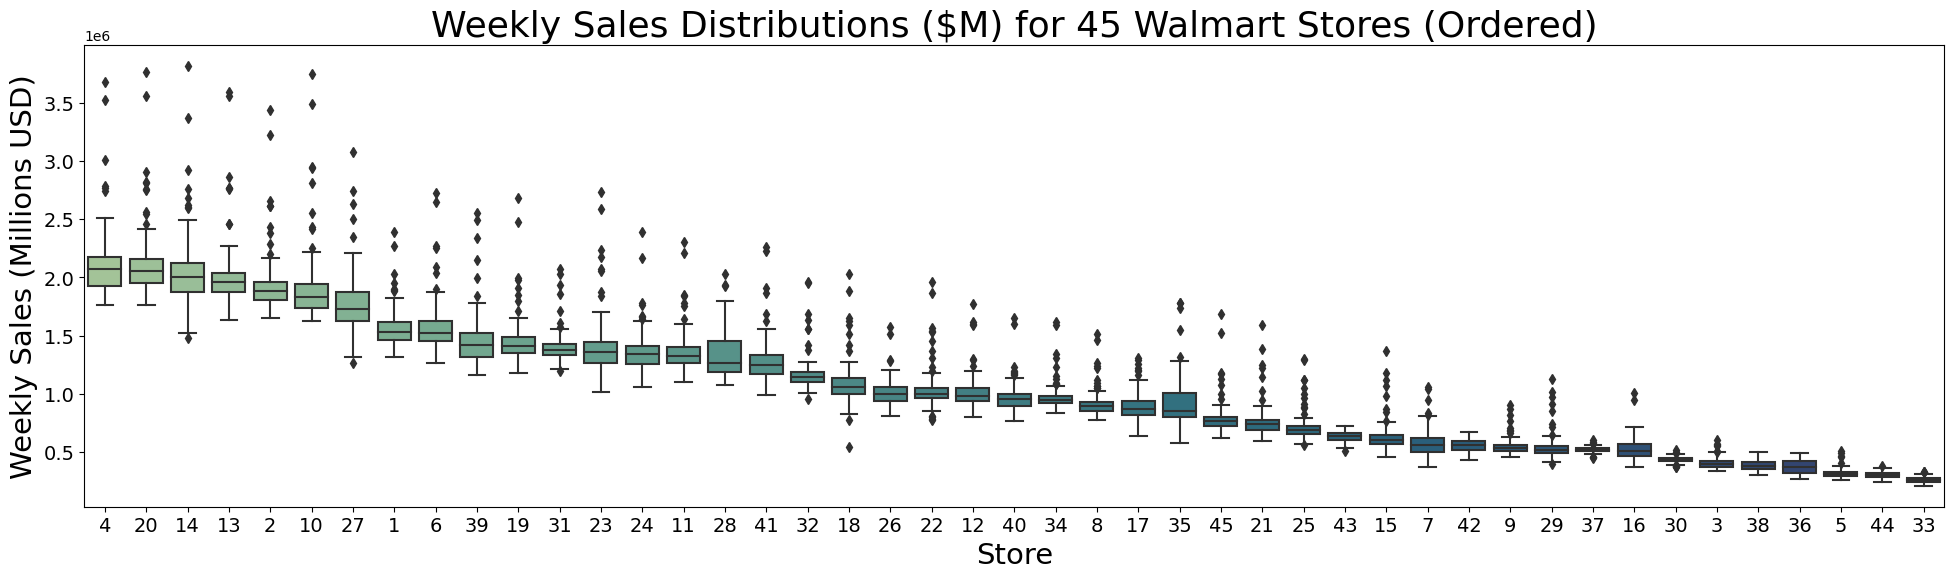

In [158]:
plt.figure(figsize=[24,6]);
sns.boxplot(data=data,x="Store",y="Weekly_Sales",orient="v",palette="crest",order=my_order);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel("Store",fontsize=21);
plt.ylabel("Weekly Sales (Millions USD)",fontsize=21);
plt.title("Weekly Sales Distributions ($M) for 45 Walmart Stores (Ordered)",fontsize=26);

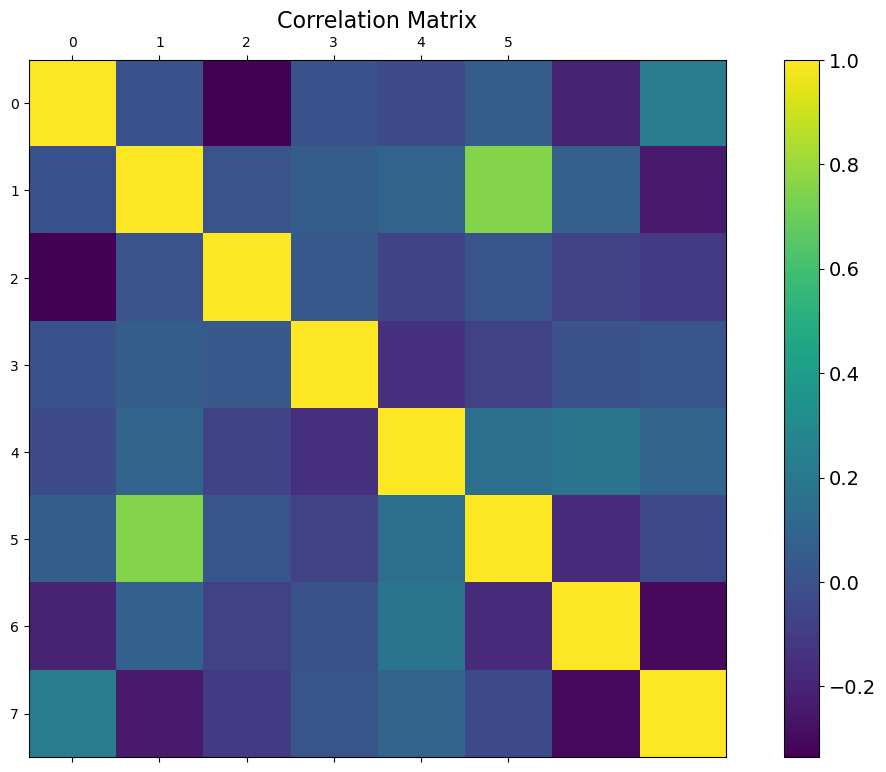

In [92]:
f = plt.figure(figsize=[15,9]);
plt.matshow(data.corr(), fignum=f.number);
cb = plt.colorbar();
cb.ax.tick_params(labelsize=14);
plt.title('Correlation Matrix', fontsize=16);
plt.xticks([0,1,2,3,4,5],)
plt.show();

In [93]:
list(data.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

Text(0.5, 1.0, 'Weekly Sales Distributions ($M) for 45 Walmart Stores')

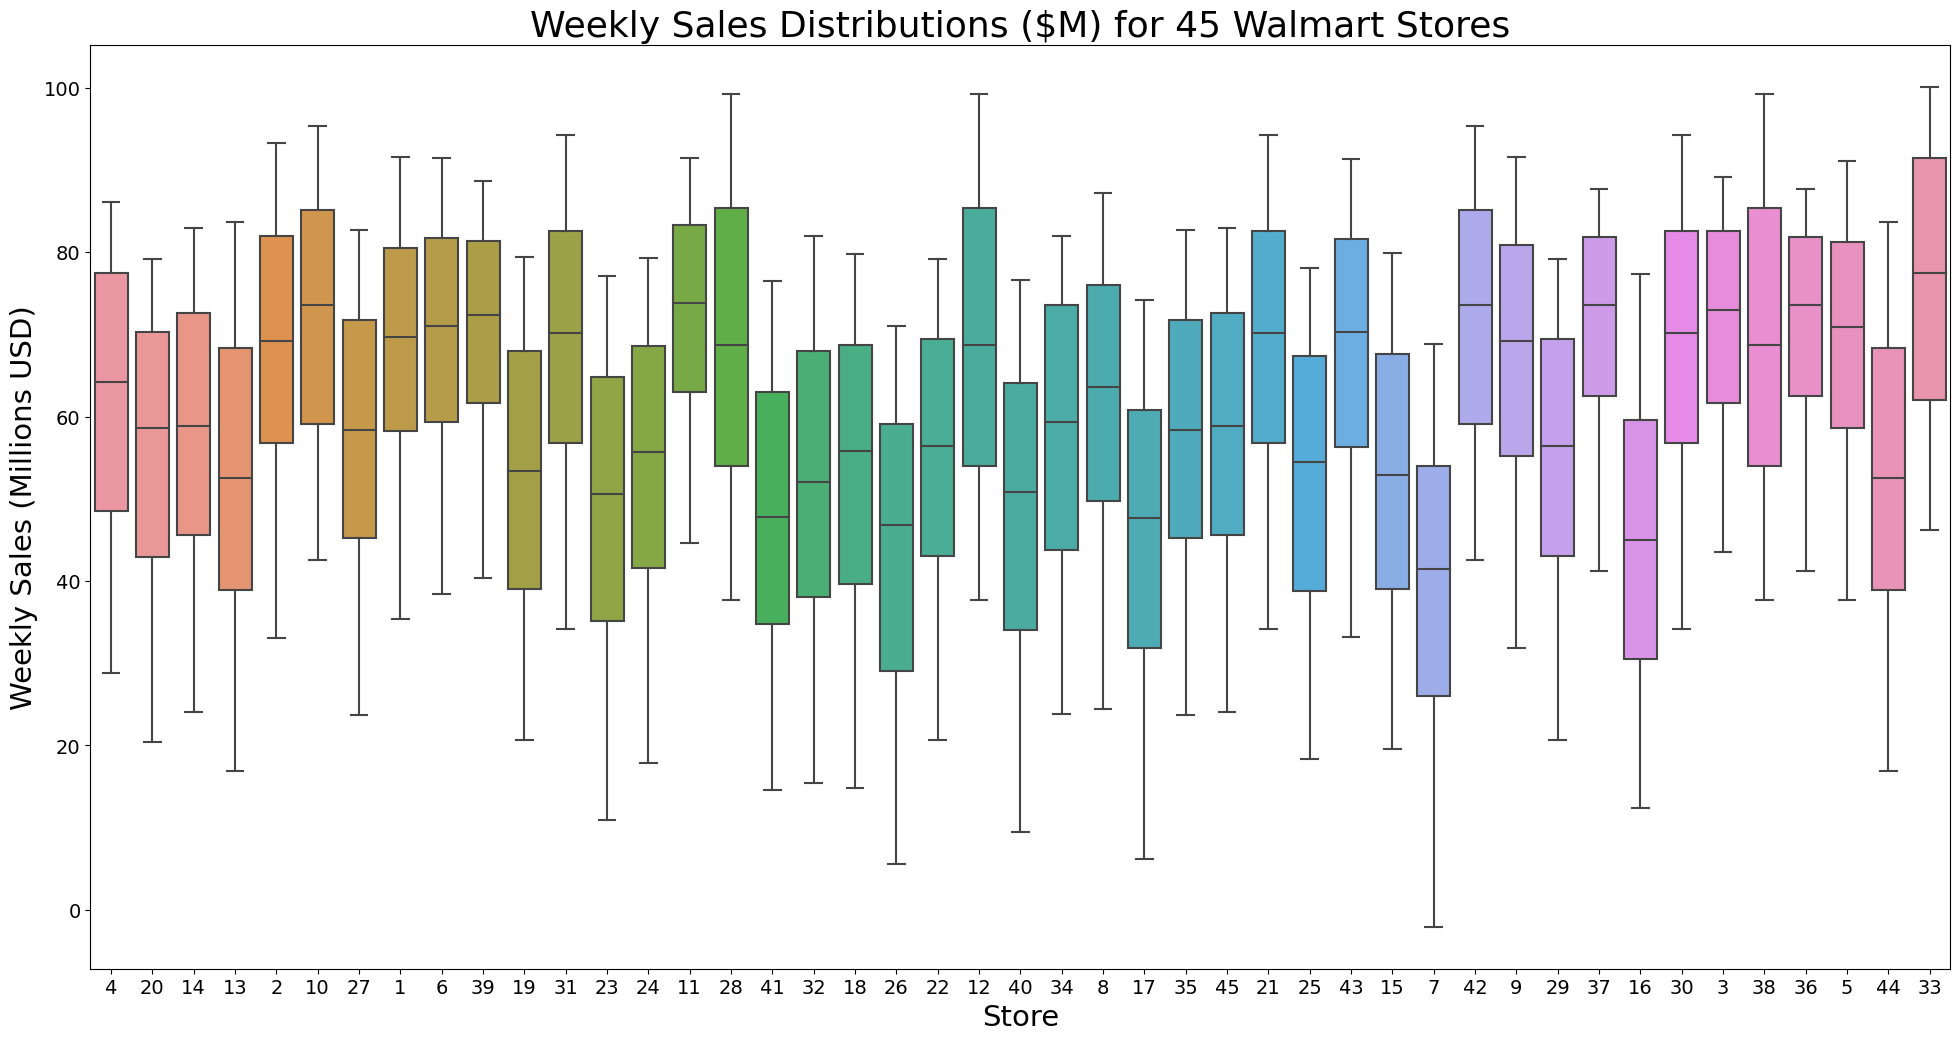

In [56]:
plt.figure(figsize=[24,12]);
sns.boxplot(data=data,x="Store",y="Temperature",orient="v",order=my_order);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel("Store",fontsize=21);
plt.ylabel("Weekly Sales (Millions USD)",fontsize=21);
plt.title("Weekly Sales Distributions ($M) for 45 Walmart Stores",fontsize=26)

c(z,y) = min(z*3, y) - z*(19/{100}) - 2*min(z*3 - y,0)

$c(z,y) = min(3z, y) - z(\dfrac{19}{100}) - 2min(3z-y,0)$

In [133]:
weeks = np.array(range(1,53))

In [134]:
weeks * 2

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104])

In [135]:
saa = weeks * 537652.92
rac = weeks * 837430.68
sba = weeks * 893204.75
car = weeks * 896813.69
ort = weeks * 915831.93

In [136]:
data = {"Week": weeks,
        "SAA": saa,
        "R&C": rac,
        "Store Baseline": sba,
        "CART": car,
        "ORT": ort}
comparison = pd.DataFrame(data)

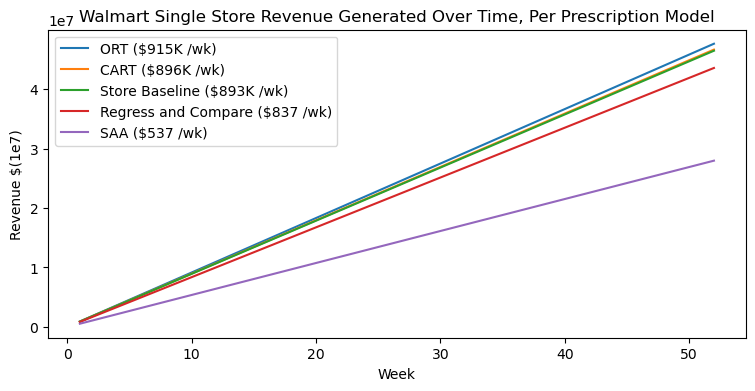

In [150]:
plt.figure(figsize=[9,4])
sns.lineplot(data=comparison,x="Week",y="ORT", label="ORT ($915K /wk)");
sns.lineplot(data=comparison,x="Week",y="CART", label="CART ($896K /wk)");
sns.lineplot(data=comparison,x="Week",y="Store Baseline", label="Store Baseline ($893K /wk)");
sns.lineplot(data=comparison,x="Week",y="R&C",label="Regress and Compare ($837 /wk)");
sns.lineplot(data=comparison,x="Week",y="SAA", label="SAA ($537 /wk)");
plt.legend();
plt.title("Walmart Single Store Revenue Generated Over Time, Per Prescription Model");
plt.ylabel("Revenue $(1e7)");